<a href="https://colab.research.google.com/github/ahmadfadhilnugraha/Ice_Gaming_Store/blob/main/Sprint_5_Ice_Gaming_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ice Gaming Store - Key Factors Influencing Video Game Success

## Table of Contents

* [Introduction](#Introduction)

1. [Data Preprocessing](#Data-Preprocessing)  
   1.1. [Importing Libraries, Reading, and Checking Data Files](#Importing-Libraries-Reading-and-Checking-Data-Files)  
   1.2. [Data Exploration](#Data-Exploration)  

2. [Data Transformation](#Data-Transformation)  
   2.1. [Data Transformation - Fix Column Name and Remove Duplicate Data](#Data-Transformation---Fix-Column-Name-and-Remove-Duplicate-Data)  
   2.2. [Data Transformation - name](#Data-Transformation---name)  
   2.3. [Data Transformation - year_of_release](#Data-Transformation---year_of_release)  
   2.4. [Data Transformation - critic_score](#Data-Transformation---critic_score)  
   2.5. [Data Transformation - user_score](#Data-Transformation---user_score)  
   2.6. [Data Transformation - rating](#Data-Transformation---rating)  

3. [Data Analysis](#Data-Analysis)  
   3.1. [Data Analysis - The Number of Video Games Released Each Year](#Data-Analysis---The-Number-of-Video-Games-Released-Each-Year)  
   3.2. [Data Analysis - The Total Sales for Video Games Varied By Platform](#Data-Analysis---The-Total-Sales-for-Video-Games-Varied-By-Platform)  
   3.3. [Data Analysis - Correlation Between Sales and Critic Score and User Score](#Data-Analysis---Correlation-Between-Sales-and-Critic-Score-and-User-Score)  
   3.4. [Data Analysis - Correlation Between Total Sales and Genre](#Data-Analysis---Correlation-Between-Total-Sales-and-Genre)  
   3.5. [Data Analysis - Top Platform Each Region](#Data-Analysis---Top-Platform-Each-Region)  
   3.6. [Data Analysis - Top Genre Each Region](#Data-Analysis---Top-Genre-Each-Region)  
   3.7. [Data Analysis - Correlation Between Total Sales and Rating](#Data-Analysis---Correlation-Between-Total-Sales-and-Rating)  

4. [Hypothesis Testing](#Hypothesis-Testing)  
   4.1. [Hypothesis 1 - Average Score for Xbox One and PC User](#Hypothesis-1---Average-Score-for-Xbox-One-and-PC-User)  
   4.2. [Hypothesis 2 - Average Score for Action and Sport Genre](#Hypothesis-2---Average-Score-for-Action-and-Sport-Genre)  

5. [Summary](#Summary)


## Introduction

In this project, we aim to analyze the success factors of video games using data from the "Ice" online store, which sells games worldwide. Leveraging user and expert reviews, genre, platform, and historical sales data, we seek to identify patterns that determine a game's success. With this insight, we can pinpoint high-potential games and strategize marketing campaigns effectively.

## Goals

1. Identify key factors influencing the success of video games.
2. Analyze sales trends across different platforms, genres, and regions.
3. Determine the impact of user and critic reviews on game sales.
4. Conduct hypothesis tests to gain deeper insights into gaming trends.

## Steps

1. **Data Preparation**: Clean and preprocess the dataset, handle missing values, and calculate total sales for each game.
2. **Data Analysis**: Explore the number of games released each year, sales variations across platforms, and the relationship between reviews and sales.
3. **User Profiling**: Analyze user demographics and preferences for different regions.
4. **Hypothesis Testing**: Evaluate hypotheses regarding platform and genre ratings.

## Data Description

* Name
* Platform
* Year of Release
* Genre
* NA sales (sales in North America, in million USD)
* EU sales (sales in Europe, in million USD)
* JP sales (sales in Japan, in million USD)
* Other sales (sales in other countries, in million USD)
* Critic Score (score from critics, maximum 100)
* User Score (score from users, maximum 10)
* Rating (ESRB)


## 1. Data Preprocessing

### 1.1. Importing Libraries, Reading, and Checking Data Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_5/games.csv')

### 1.2. Data Exploration

In [4]:
def inspect_df(df):
  print(df.info())
  display(df.head())

In [5]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


There are some points we need to highlight after checking the dataset.

- The dataset contains 16,715 rows, with several columns exhibiting null values, notably 'Name,' 'Year_of_Release,' 'Genre,' 'Critic_Score,' 'User_Score,' and 'Rating.'
- 'User_Score' and 'Rating' columns are particularly concerning as they lack nearly a third of their values, posing a significant challenge that requires further investigation for potential imputation or column dropping.
- Some column names have a mix of uppercase and lowercase letters, which should be corrected to prevent errors when calling column names.
- Non-uniqueness in the 'Name' column suggests potential duplicate data that needs verification.
- Data types inspection reveals discrepancies; 'Year_of_Release' should contain integers and 'User_Score' should be in float64 format, but observations show otherwise, necessitating conversion for accurate analysis.
- Consideration should be given to excluding game data from 1980 to 2016 to facilitate predictions for 2017.

To address these anomalies, the subsequent steps involve rectifying missing values and correcting data types. Furthermore, efforts will be made to augment data quality by incorporating additional information.

## 2. Data Transformation

### 2.1. Data Transformation - Fix Column Name and Remove Duplicate Data

In [7]:
# Fix column name into lowercase character
df.columns= df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Remove duplicate data
df.drop_duplicates(inplace = True)
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2. Data Transformation - name

In [9]:
# check missing value at 'name' column
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We can safely drop the rows with missing values, as only 0.01% of the overall dataset, which amounts to just 2 names, are missing. This action will have no impact on the findings.

In [10]:
# remove missing values
df.dropna(subset=['name'], inplace=True)
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.3. Data Transformation - year_of_release

In [11]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


On 'year_of_release' column, we have 269 missing values. In this section, I performed data imputation by grouping based on the 'Name' column. Upon analysis, it was found that several games share the same name but are released on different platforms. Through this analysis, it became evident that the release year remains the same despite the differing platforms. Therefore, missing data can be filled by first grouping the data based on the 'Name' column.

In [12]:
# create function for fill missing value with mean value by categorizing based on other column
def fill_missing_value_mean(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [13]:
df = fill_missing_value_mean(df, 'name', 'year_of_release')

In [14]:
df['year_of_release'].isnull().sum()

146

After using the above function to fill in missing values, some data points remain missing. This may occur because those games were only released on one console, making it impossible to fill in values based on grouping. Since the number of these missing data points is relatively minor, approximately 0.8% of the total dataset, they will be removed.

In [15]:
df.dropna(subset=['year_of_release'], inplace=True)
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [16]:
# Change data type become integer
df['year_of_release'] = df['year_of_release'].astype('int')
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.4. Data Transformation - critic_score

In [17]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Given that approximately 50% of the data is missing, dropping it entirely is not a viable option. The absence of values in the 'Critic_Score' column could be attributed to games not yet being reviewed by critics. Hence, for the missing data, filling them using the median or mean based on grouping by genre is a suitable approach.

In [18]:
# create function for fill missing value with median value by categorizing based on other column
def fill_missing_value_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [19]:
df = fill_missing_value_mean(df, 'genre', 'critic_score')
df['critic_score'] = df['critic_score'].round(2)

In [20]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,NaN,NaN


### 2.5. Data Transformation - user_score

In [21]:
df[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.35,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.28,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.66,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,72.00,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.27,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.07,NaN,NaN


Similar to the 'Critic_Score' column, around 40% of the data is missing in the 'User_Score' column. This may also be because users haven't reviewed the games yet. This column will also be filled using the mean based on grouping by genre. Additionally, the presence of 'tbd' values indicates missing data as well.

In [22]:
# replace tbd become NaN
df.loc[df['user_score'] == "tbd", 'user_score']= 'NaN'

In [23]:
# change data type to float
df['user_score'] =df['user_score'].astype(float)

In [24]:
df = fill_missing_value_mean(df, 'genre', 'user_score')
df['user_score'] = df['user_score'].round(2)

In [25]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,7.30,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,7.62,NaN


### 2.6. Data Transformation - rating

In [26]:
df[df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,7.30,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,7.62,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,67.35,7.16,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.28,7.05,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.60,7.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.66,7.06,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,72.00,6.96,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.27,7.14,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.07,7.30,NaN


Similar to the previous columns, the 'Rating' column also experiences approximately 40% data loss. This could be because the games haven't been assigned a rating by reviewers yet. For now, all NaN data will be changed to 'unknown'.

In [27]:
df['rating'] = df['rating'].fillna('unknown')

In [28]:
df['rating'].value_counts()

unknown    6699
E          3958
T          2930
M          1554
E10+       1412
EC            8
K-A           3
RP            2
AO            1
Name: rating, dtype: int64

There are several similar rating types, resulting in some ratings having very few occurrences. Grouping will be performed for certain rating types to improve the analysis.

In [29]:
df['rating'] = df['rating'].replace('EC', 'E10+')
df['rating'] = df['rating'].replace('K-A', 'T')
df['rating'] = df['rating'].replace('AO', 'M')
df['rating'] = df['rating'].replace('RP', 'unknown')

In [30]:
df['rating'].value_counts()

unknown    6701
E          3958
T          2933
M          1555
E10+       1420
Name: rating, dtype: int64

In [31]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,7.30,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,7.62,unknown


### 2.7. Aggregating Sales Each Region

In [32]:
# create total_sales column based on the sum of sales for each region
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.07,7.30,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.67,7.62,unknown,31.38


## 3. Data Analysis

### 3.1. Data Analysis - The Number of Video Games Released Each Year

In [33]:
# Create a pivot table showing how many video games were released for each year
df_pivot_1 = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

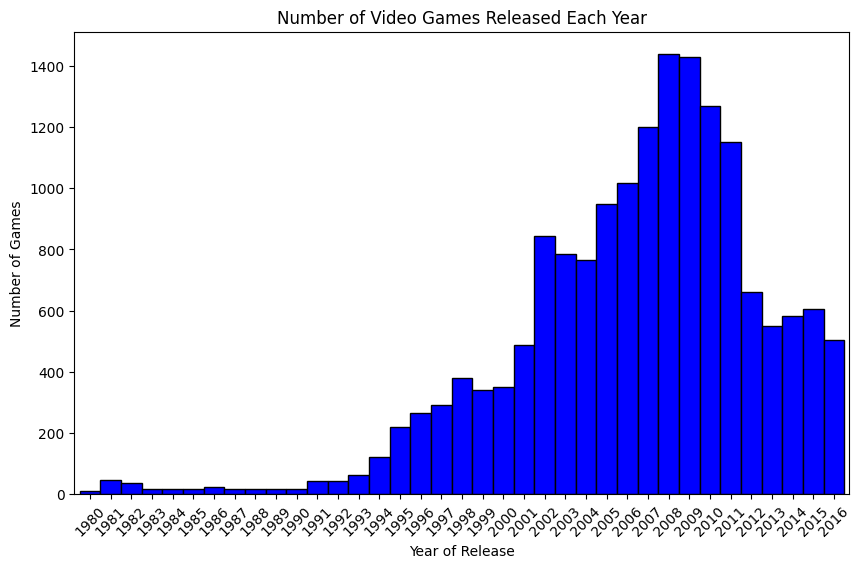

In [34]:
df_pivot_1.plot(kind='bar', figsize=(10, 6), color='blue', width=1, edgecolor='black')

plt.title('Number of Video Games Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.legend().set_visible(False)

plt.show()

Between 1995 and 2016, the majority of games were released. There was a significant increase in the number of game releases from 2007 to 2010. However, in the following years, there was a decrease in game releases, stabilizing around 600 games released per year until 2016.

### 3.2. Data Analysis - The Total Sales for Video Games Varied By Platform

In [35]:
# Create pivot table showing the total global sales for each platform.
df_pivot_2 = df.pivot_table(index='platform',
                            values='total_sales',
                            aggfunc='sum').sort_values(by = 'total_sales',
                                                       ascending = False)

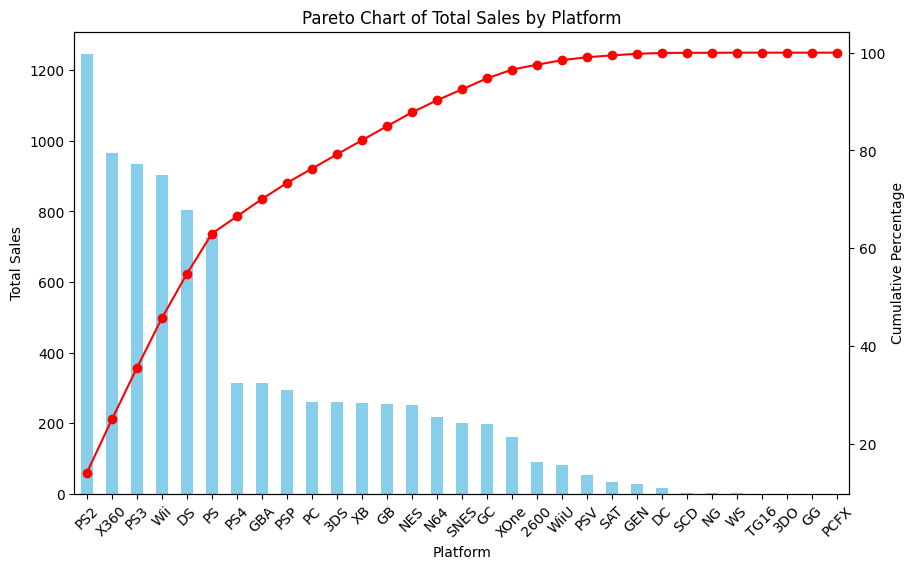

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 6))
df_pivot_2.plot(kind='bar', ax=ax1, color='skyblue', legend=False, rot=45)

ax2 = ax1.twinx()

cumulative_percentage = df_pivot_2['total_sales'].cumsum() / df_pivot_2['total_sales'].sum() * 100

cumulative_percentage.plot(ax=ax2, color='red', marker='o')

ax1.set_title('Pareto Chart of Total Sales by Platform')
ax1.set_xlabel('Platform')
ax1.set_ylabel('Total Sales')
ax2.set_ylabel('Cumulative Percentage')
plt.show()

The platform with the highest sales are: PS2, X360, PS3, Wii, DS and PS. Let's look the sales distribution for all platforms based on sales each year.

In [37]:
def plot_sales_distribution_for_each_platform(df, platforms):
    df_platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

    df_platform_year_sales = df_platform_year_sales[df_platform_year_sales['platform'].isin(platforms)]

    num_platforms = len(platforms)
    num_rows = (num_platforms + 3) // 4

    fig, axs = plt.subplots(num_rows, 4, figsize=(15, 4 * num_rows), constrained_layout=True)

    for i, platform in enumerate(platforms):
        row = i // 4
        col = i % 4

        df_platform = df_platform_year_sales[df_platform_year_sales['platform'] == platform]

        df_pivot = df_platform.pivot(index='year_of_release', columns='platform', values='total_sales')

        df_pivot.plot(kind='bar', stacked=True, color='skyblue', ax=axs[row, col], legend=False)

        axs[row, col].set_title(f'{platform}')
        axs[row, col].set_xlabel('Year of Release')
        axs[row, col].set_ylabel('Total Sales')
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [38]:
all_platform = df['platform'].unique()

<ipython-input-37-695876710ce5>:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


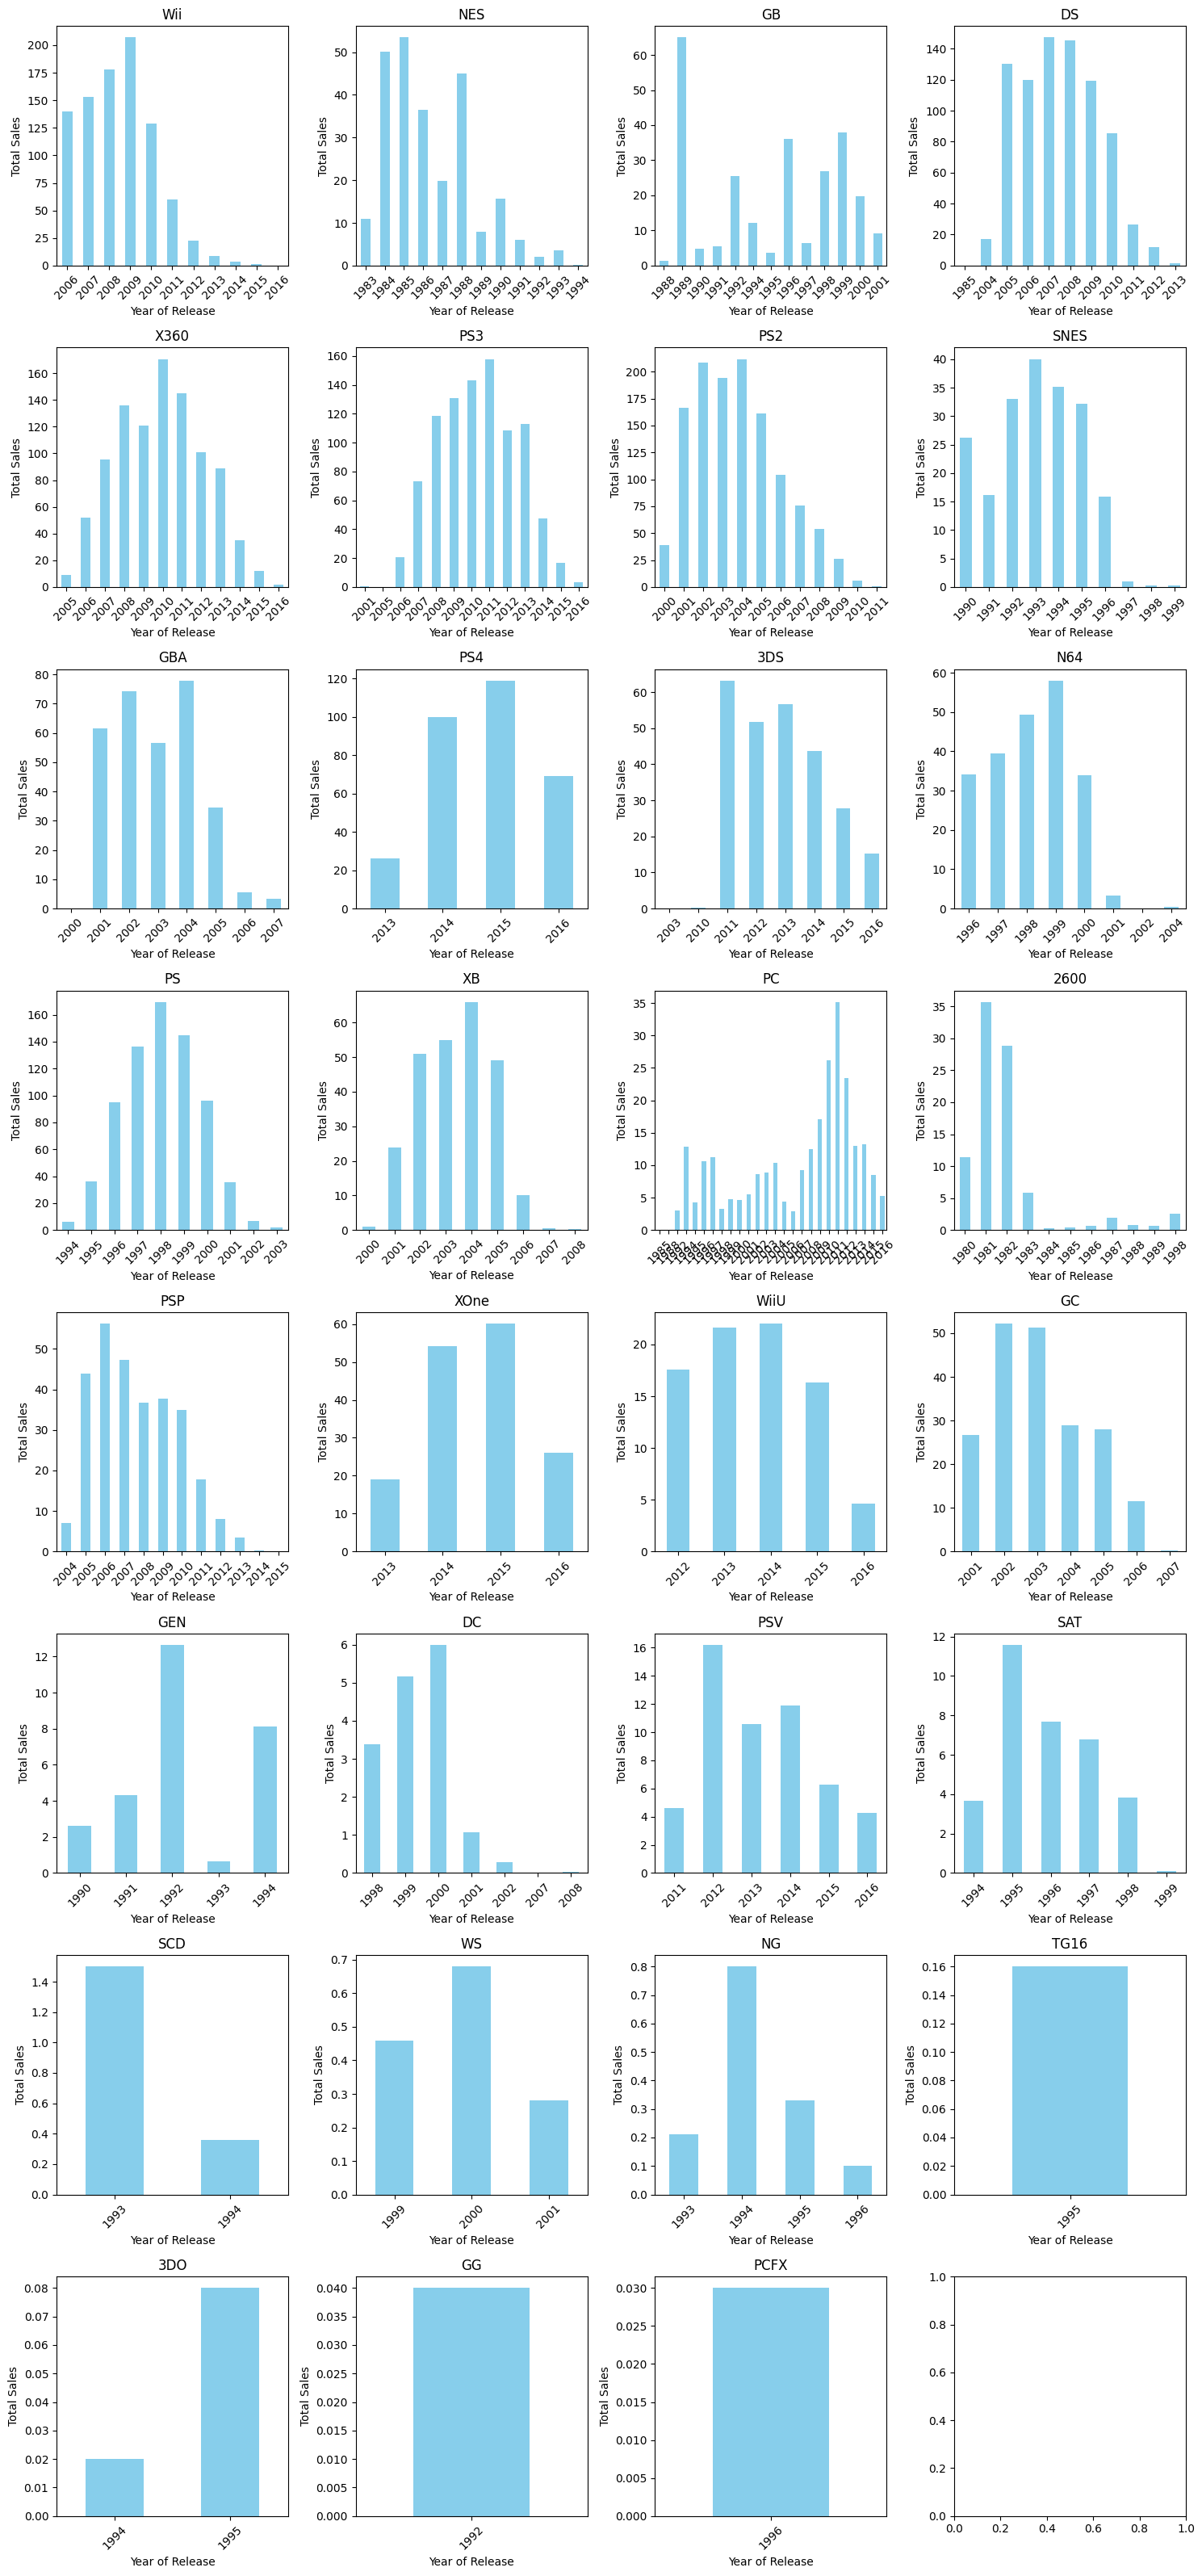

In [39]:
plot_sales_distribution_for_each_platform(df,all_platform)

In [40]:
def plot_sales_distribution_for_all_platforms(df, platforms, title='All Platforms'):
    df_platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

    df_platform_year_sales = df_platform_year_sales[df_platform_year_sales['platform'].isin(platforms)]

    df_pivot = df_platform_year_sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    plt.figure(figsize=(12, 8))
    for platform in platforms:
        plt.plot(df_pivot.index, df_pivot[platform], label=platform)

    plt.title(f'Sales Distribution for {title} Across All Years')
    plt.xlabel('Year of Release')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)

    plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

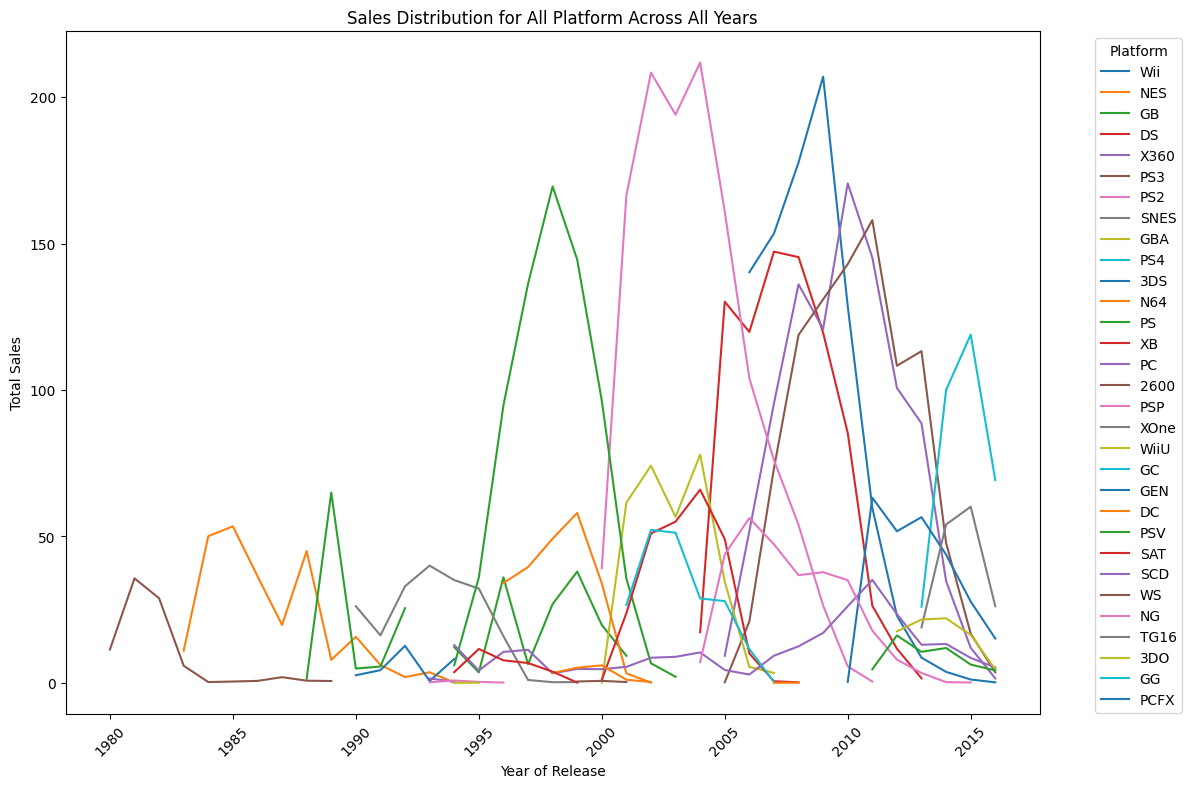

In [41]:
plot_sales_distribution_for_all_platforms(df, all_platform, title='All Platform')

In [42]:
top_6_platforms_list = df_pivot_2.head(6).index.tolist()

print("Top 6 platforms based on total sales:")
print(top_6_platforms_list)

Top 6 platforms based on total sales:
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


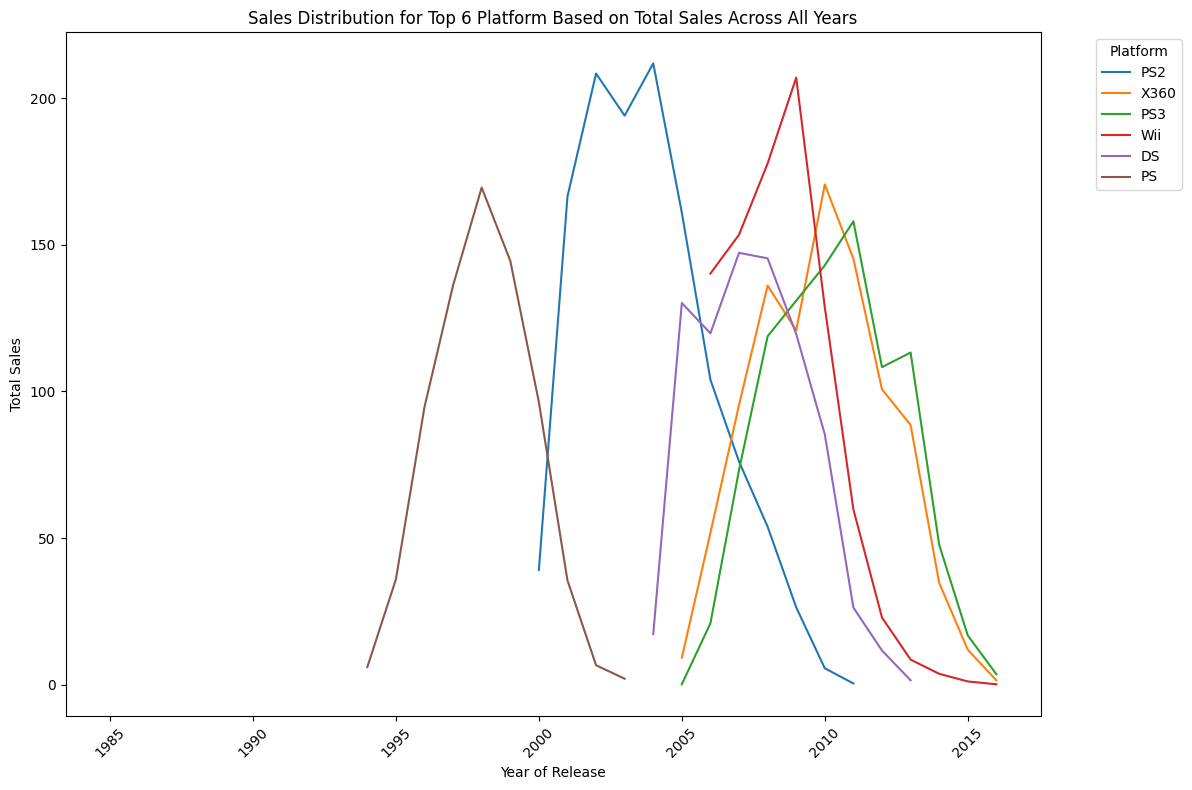

In [43]:
plot_sales_distribution_for_all_platforms(df, top_6_platforms_list, title='Top 6 Platform Based on Total Sales')

Let's check sales distribution for platforms that ever reach 100 millions sales a year

In [44]:
platform_yearly_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum()
platforms_over_100m_yearly_sales = platform_yearly_sales[platform_yearly_sales > 100]
platforms_over_100m_yearly_sales_list = platforms_over_100m_yearly_sales.index.get_level_values('platform').unique().tolist()

print("Platforms that have had yearly sales exceeding 100 million:")
print(platforms_over_100m_yearly_sales_list)

Platforms that have had yearly sales exceeding 100 million:
['DS', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']


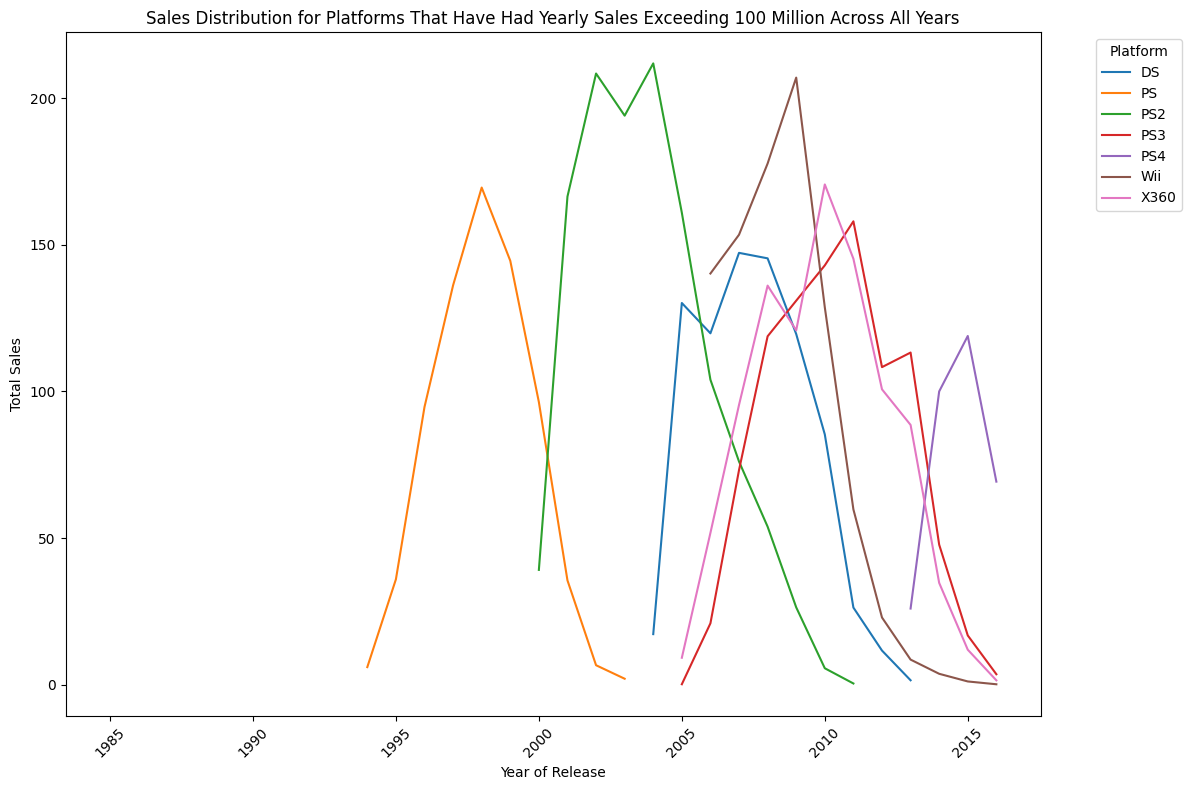

In [45]:
plot_sales_distribution_for_all_platforms(df, platforms_over_100m_yearly_sales_list, title='Platforms That Have Had Yearly Sales Exceeding 100 Million')

Based on the data, it's evident that the number of games tends to increase from 1995 to 2008, followed by a decline from 2009 to 2015. The top 6 platforms in terms of total sales are PS2, X360, Wii, PS3, DS, and PS. Notably, PS2 experienced peak sales in 2002 and a drastic decline from 2004, eventually reaching zero sales by 2011. Some platforms, once highly popular with annual sales reaching $100 million, have seen their sales decline to zero due to the emergence of newer platforms.

Among these platforms, PS reached its peak sales in 1998, while its lowest sales were recorded in 2003. PS2 peaked in 2002 and experienced its lowest sales in 2012. DS reached its peak in 2007 and its lowest sales in 2013. Wii peaked in 2009 and had its lowest sales in 2016. X360 peaked in 2010 and had its lowest sales in 2016. PS3 peaked in 2011 and had its lowest sales in 2016. PS4 peaked in 2015.

Platforms that reach $100 million in annual sales typically experience a decline in popularity after 7 years, while their popularity can increase depending on the platform's developer. PS platforms generally experience a surge in popularity after 2 years, while Wii and X360 take around 5 years to increase in popularity. It seems that a platform's popularity lasts for about 10 years.

Therefore, to make predictions for 2017 in this study, data from 2005 to 2015 will be used, as it is assumed that the 2016 data is still incomplete.

### 3.3. Data Analysis - Correlation Between Sales and Critic Score and User Score

In this section, I will use data from platforms that have ever achieved sales above 100 million to ensure that the displayed data meets expectations. Platforms that are not selected carry the risk of displaying data that may pose issues during analysis.

In [46]:
print("Platforms that have had yearly sales exceeding 100 million:")
print(platforms_over_100m_yearly_sales_list)

Platforms that have had yearly sales exceeding 100 million:
['DS', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']


In [47]:
platform_datasets = {}

In [48]:
# make data set for each platform
for platform in platforms_over_100m_yearly_sales_list:
    platform_data = df[df['platform'] == platform]
    platform_datasets[platform] = platform_data

In [49]:
ds_data = platform_datasets['DS']
ps_data = platform_datasets['PS']
ps2_data = platform_datasets['PS2']
ps3_data = platform_datasets['PS3']
ps4_data = platform_datasets['PS4']
wii_data = platform_datasets['Wii']
x360_data = platform_datasets['X360']

In [50]:
dataset_names = [f"{platform.lower()}_data" for platform in platform_datasets]

In [51]:
dataset_names

['ds_data',
 'ps_data',
 'ps2_data',
 'ps3_data',
 'ps4_data',
 'wii_data',
 'x360_data']

<Axes: xlabel='total_sales', ylabel='critic_score'>

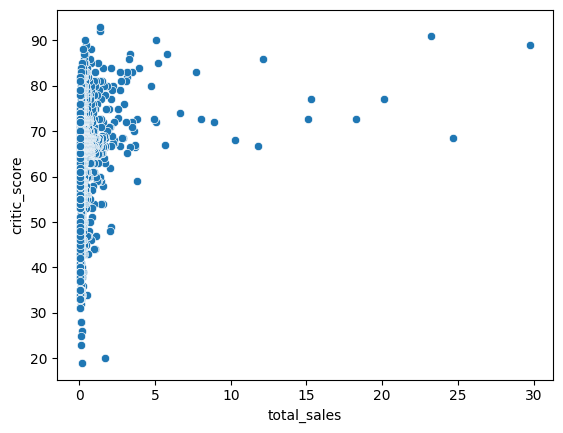

In [52]:
sns.scatterplot(data=ds_data, x='total_sales', y='critic_score')

In [53]:
def scatterplot_total_sales_critic_score(dataset):
    num_plots = len(dataset)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 3))

    axes = axes.flatten()

    for i, (platform, data) in enumerate(dataset.items()):
        row = i // 2
        col = i % 2

        axes[i].scatter(data['total_sales'], data['critic_score'], alpha=0.3)

        axes[i].set_title(f'Scatterplot for {platform}')
        axes[i].set_xlabel('Total Sales')
        axes[i].set_ylabel('Critic Score')

    plt.tight_layout()

    plt.show()

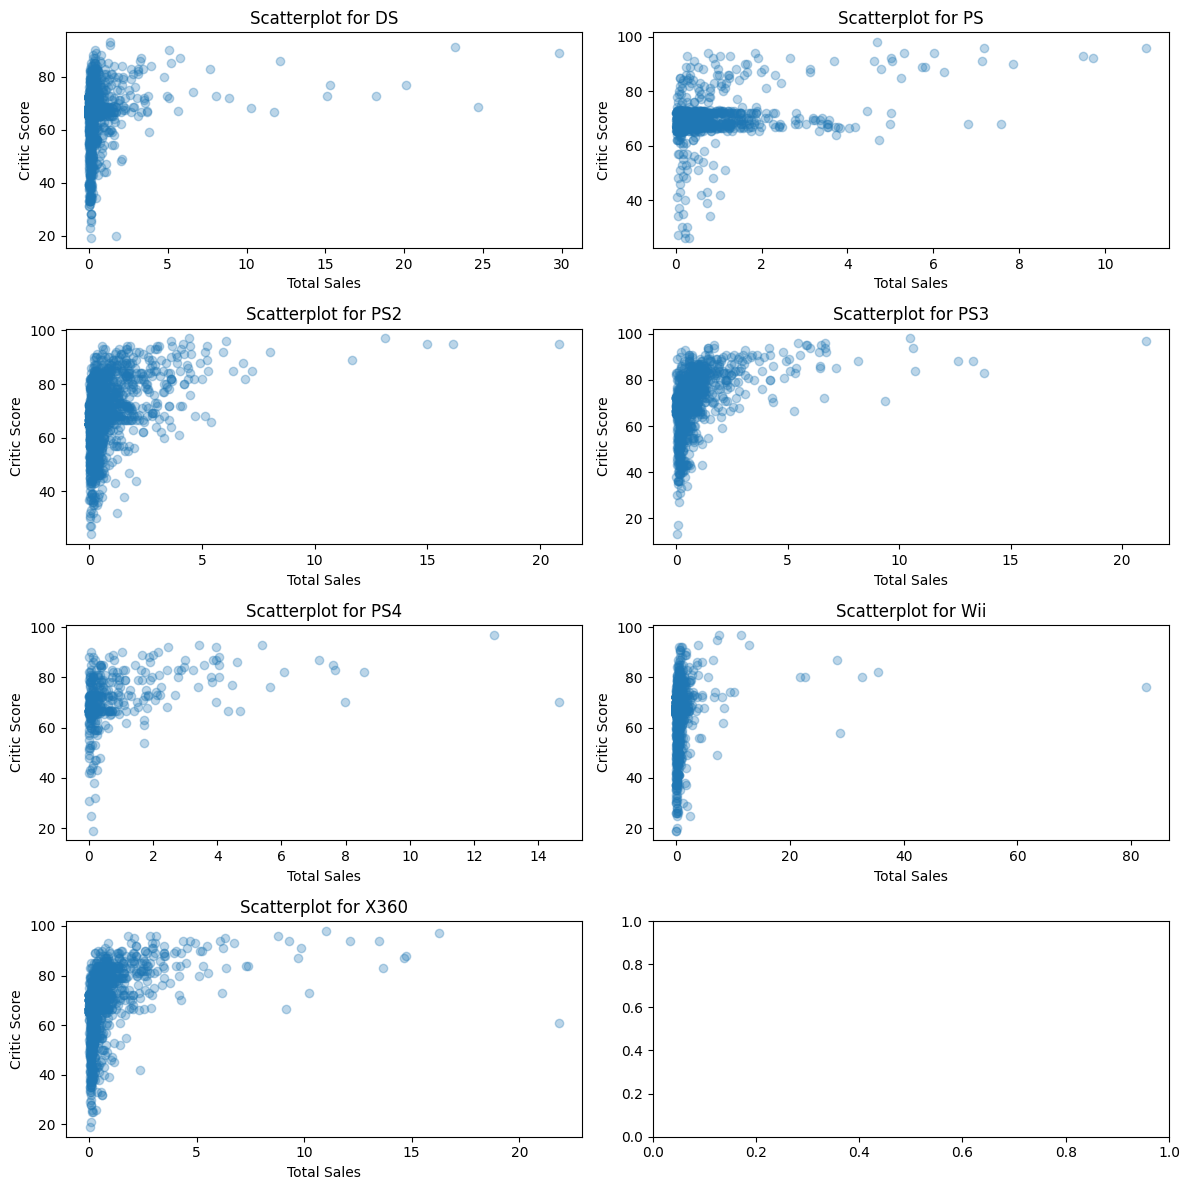

In [54]:
scatterplot_total_sales_critic_score(platform_datasets)

In [55]:
def scatterplot_total_sales_user_score(dataset):
    num_plots = len(dataset)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 3))

    axes = axes.flatten()

    for i, (platform, data) in enumerate(dataset.items()):

        row = i // 2
        col = i % 2

        axes[i].scatter(data['total_sales'], data['user_score'], alpha=0.3)

        axes[i].set_title(f'Scatterplot for {platform}')
        axes[i].set_xlabel('Total Sales')
        axes[i].set_ylabel('User Score')

    plt.tight_layout()

    plt.show()

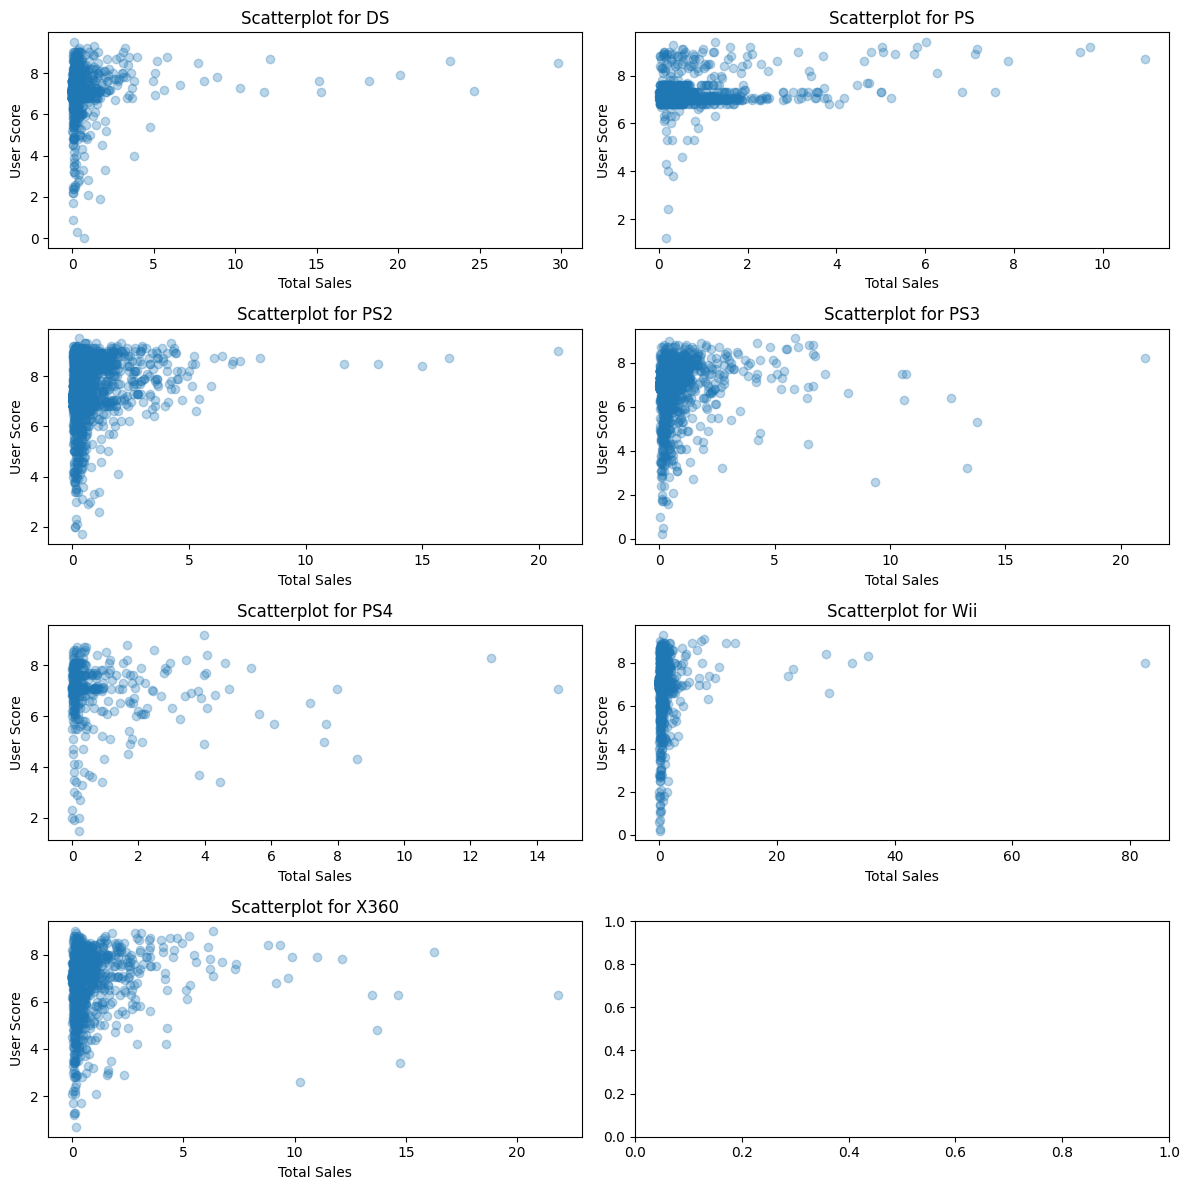

In [56]:
scatterplot_total_sales_user_score(platform_datasets)

In [57]:
def calculate_correlation(dataset):
    for platform, data in dataset.items():
        critic_corr = data['total_sales'].corr(data['critic_score'])

        user_corr = data['total_sales'].corr(data['user_score'])

        print(f'Correlation coefficients for {platform}:')
        print(f'- Critic Score VS Total Sales: {critic_corr:.4f}')
        print(f'- User Score VS Total Sales: {user_corr:.4f}')
        print()

In [58]:
calculate_correlation(platform_datasets)

Correlation coefficients for DS:
- Critic Score VS Total Sales: 0.1551
- User Score VS Total Sales: 0.1030

Correlation coefficients for PS:
- Critic Score VS Total Sales: 0.3336
- User Score VS Total Sales: 0.3006

Correlation coefficients for PS2:
- Critic Score VS Total Sales: 0.3720
- User Score VS Total Sales: 0.2116

Correlation coefficients for PS3:
- Critic Score VS Total Sales: 0.4219
- User Score VS Total Sales: 0.0842

Correlation coefficients for PS4:
- Critic Score VS Total Sales: 0.3547
- User Score VS Total Sales: -0.0509

Correlation coefficients for Wii:
- Critic Score VS Total Sales: 0.1288
- User Score VS Total Sales: 0.0903

Correlation coefficients for X360:
- Critic Score VS Total Sales: 0.3752
- User Score VS Total Sales: 0.0859



The correlation coefficients reveal the relationship between total sales and critic/user scores for each platform. Among the analyzed platforms, PS3 exhibits the strongest positive correlation between critic scores and total sales, followed closely by PS2 and PS4. Conversely, PS4 displays a weak negative correlation between user scores and total sales, suggesting that higher user scores may not necessarily translate to higher sales for this platform. Other platforms, such as DS, Wii, and X360, demonstrate moderate positive correlations between critic scores and total sales, while user scores show weaker positive correlations. These findings highlight the nuanced relationship between critical acclaim, user satisfaction, and sales performance across different gaming platforms.

### 3.4. Data Analysis - Correlation Between Total Sales and Genre

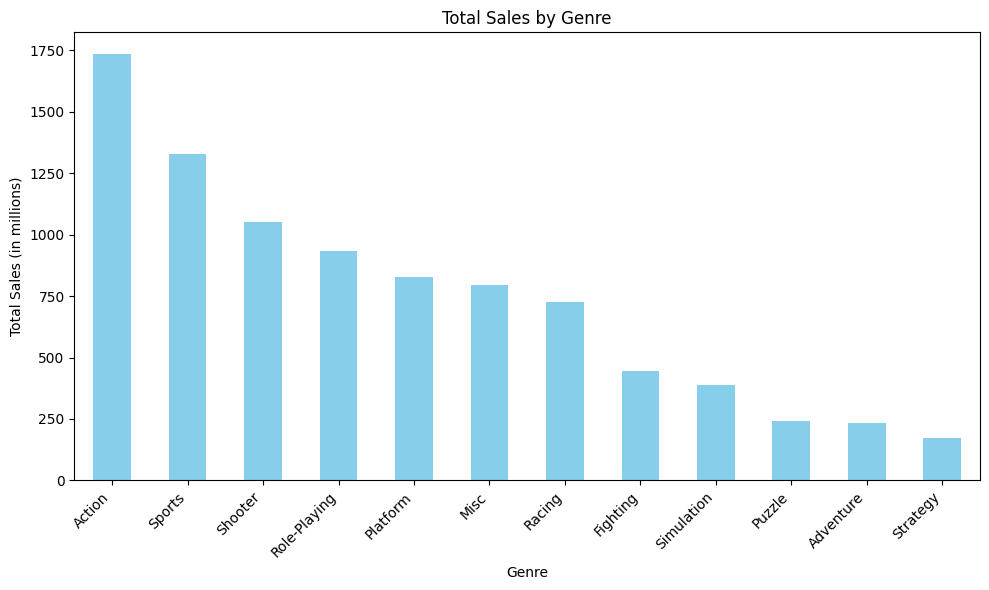

In [59]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The analysis reveals that the action genre dominates in terms of total sales, followed closely by sports, shooter, role-playing, and platform genres, in descending order. This ranking provides valuable insights into consumer preferences within the gaming industry, highlighting the popularity of action-oriented gameplay experiences. Understanding these trends can inform strategic decisions for game developers and publishers, guiding their efforts in creating and marketing products that align with audience interests and maximize revenue potential.

### 3.5. Data Analysis - Top Platform Each Region

In [60]:
def plot_top_platforms(region_sales, region_name):
    plt.figure(figsize=(10, 6))
    region_sales.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Platforms in {region_name}')
    plt.xlabel('Platform')
    plt.ylabel('Total Sales (in millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [61]:
na_sales_by_platform = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
jp_sales_by_platform = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
eu_sales_by_platform = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

# Select the top 5 platforms for each region
top_na_platforms = na_sales_by_platform.head(5)
top_jp_platforms = jp_sales_by_platform.head(5)
top_eu_platforms = eu_sales_by_platform.head(5)

print("Top 5 Platforms in North America (NA Sales):\n", top_na_platforms)
print("\nTop 5 Platforms in Japan (JP Sales):\n", top_jp_platforms)
print("\nTop 5 Platforms in Europe (EU Sales):\n", top_eu_platforms)

Top 5 Platforms in North America (NA Sales):
 platform
X360    599.15
PS2     580.09
Wii     494.01
PS3     391.60
DS      381.38
Name: na_sales, dtype: float64

Top 5 Platforms in Japan (JP Sales):
 platform
DS      175.02
PS      139.78
PS2     137.74
SNES    116.55
3DS     100.64
Name: jp_sales, dtype: float64

Top 5 Platforms in Europe (EU Sales):
 platform
PS2     337.05
PS3     328.97
X360    269.79
Wii     261.48
PS      212.39
Name: eu_sales, dtype: float64


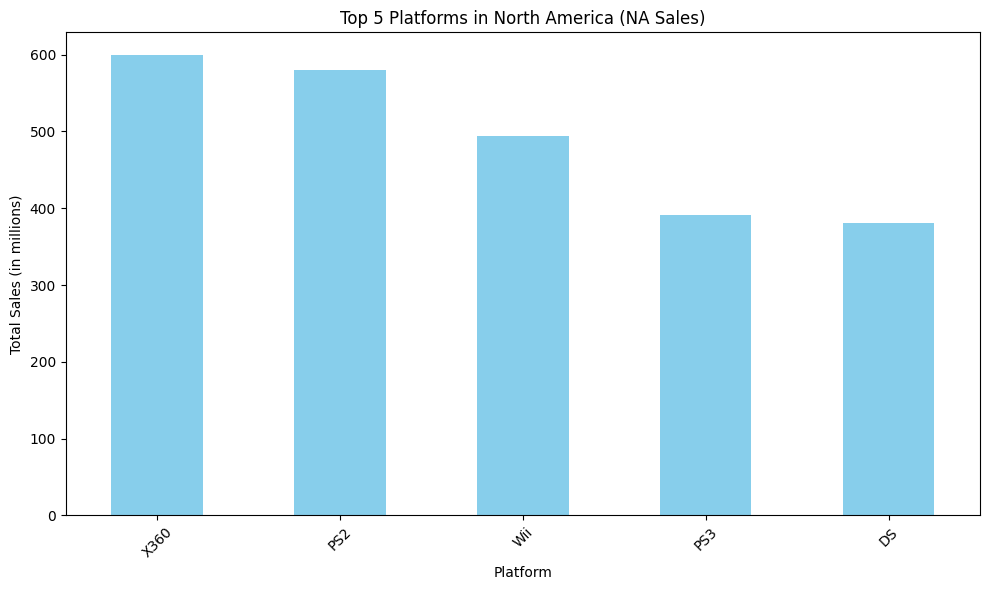

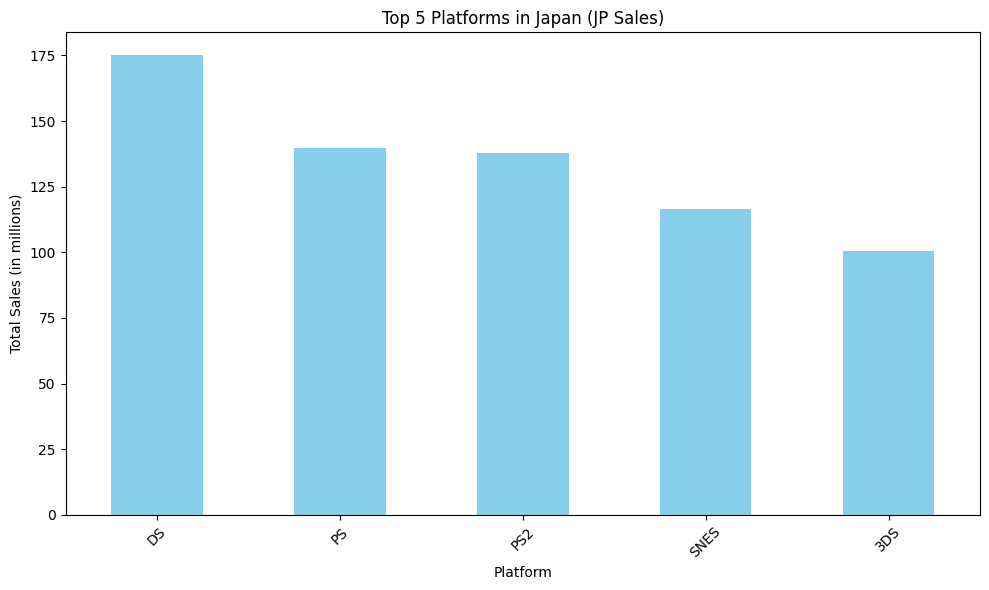

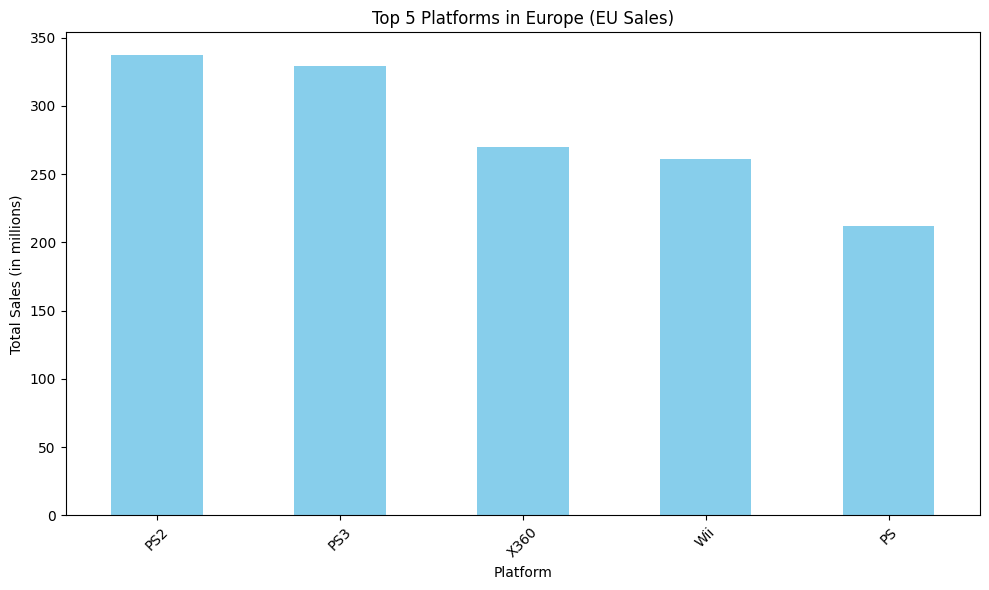

In [62]:
plot_top_platforms(top_na_platforms, 'North America (NA Sales)')
plot_top_platforms(top_jp_platforms, 'Japan (JP Sales)')
plot_top_platforms(top_eu_platforms, 'Europe (EU Sales)')

The sales data reveals the top 5 gaming platforms in three key regions: North America (NA), Japan (JP), and Europe (EU), all in USD. In North America, the X360 leads with sales totaling 599.15 million, closely followed by the PS2 with 580.09 million. The Wii and PS3 also exhibit strong sales performance, each surpassing the 300 million mark. Meanwhile, in Japan, the DS emerges as the dominant platform, generating sales of 175.02 million. The PS and PS2 follow closely behind, with sales exceeding 100 million. In Europe, the PS2 claims the top spot with sales reaching 337.05 million, demonstrating its enduring popularity. The PS3 and X360 also demonstrate significant sales success in the European market, with sales figures exceeding 250 million. These findings underscore the regional variations in gaming platform preferences and highlight the diverse landscape of the gaming industry across different markets.

### 3.6. Data Analysis - Top Genre Each Region

In [63]:
na_sales_by_genre = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
jp_sales_by_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
eu_sales_by_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

# Selecting the top 5 genres for each region
top_na_genres = na_sales_by_genre.head(5)
top_jp_genres = jp_sales_by_genre.head(5)
top_eu_genres = eu_sales_by_genre.head(5)

print("Top 5 Genres in North America (NA Sales):\n", top_na_genres)
print("\nTop 5 Genres in Japan (JP Sales):\n", top_jp_genres)
print("\nTop 5 Genres in Europe (EU Sales):\n", top_eu_genres)

Top 5 Genres in North America (NA Sales):
 genre
Action      873.70
Sports      681.69
Shooter     590.35
Platform    444.44
Misc        401.69
Name: na_sales, dtype: float64

Top 5 Genres in Japan (JP Sales):
 genre
Role-Playing    353.88
Action          160.15
Sports          135.27
Platform        130.71
Misc            108.04
Name: jp_sales, dtype: float64

Top 5 Genres in Europe (EU Sales):
 genre
Action     517.58
Sports     375.60
Shooter    316.96
Racing     235.47
Misc       211.32
Name: eu_sales, dtype: float64


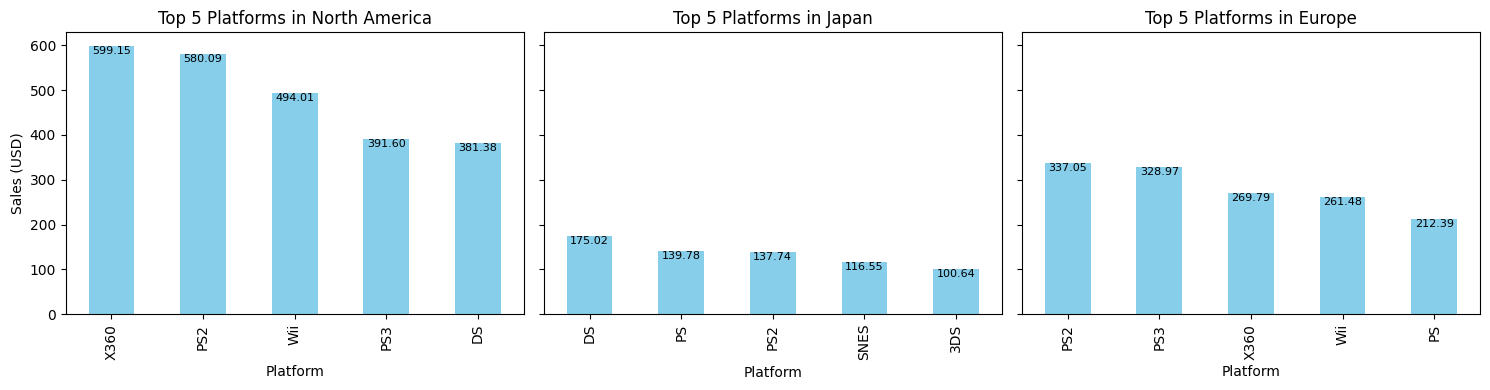

In [64]:
def plot_top_platforms(df):
    regions = ['North America', 'Japan', 'Europe']
    sales_columns = ['na_sales', 'jp_sales', 'eu_sales']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

    for i, region in enumerate(regions):
        top_platforms = df.groupby('platform')[sales_columns[i]].sum().nlargest(5)
        ax = top_platforms.plot(kind='bar', ax=axes[i], color='skyblue')
        ax.set_title(f'Top 5 Platforms in {region}')
        ax.set_xlabel('Platform')
        ax.set_ylabel('Sales (USD)')

        for idx, (platform, value) in enumerate(top_platforms.items()):
            ax.text(idx, value, f'{value:.2f}', ha='center', va='top', fontsize=8)

    plt.tight_layout()
    plt.show()

plot_top_platforms(df)


The top 5 genres in North America by sales are Action, Sports, Shooter, Platform, and Misc, with Action leading by a significant margin at 873.70 million in sales. In Japan, Role-Playing emerges as the dominant genre with 353.88 million in sales, followed by Action, Sports, Platform, and Misc. Meanwhile, in Europe, Action takes the top spot with 517.58 million in sales, followed by Sports, Shooter, Racing, and Misc. Overall, Action and Sports appear to be consistently popular across all three regions, while other genres like Shooter and Role-Playing show regional variations in popularity.

### 3.7. Data Analysis - Correlation Between Total Sales and Rating

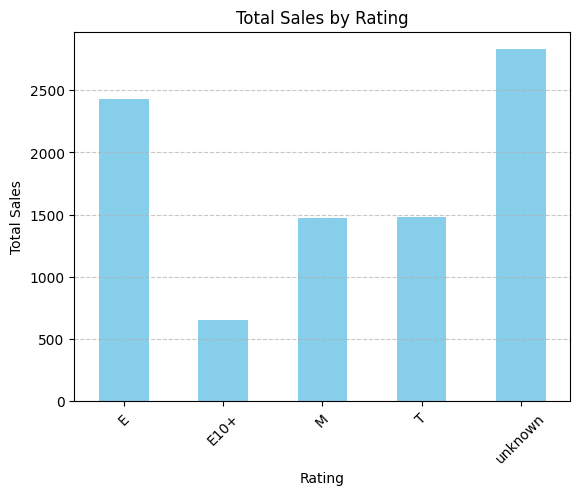

In [65]:
rating_sales = df.groupby('rating')['total_sales'].sum()

rating_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

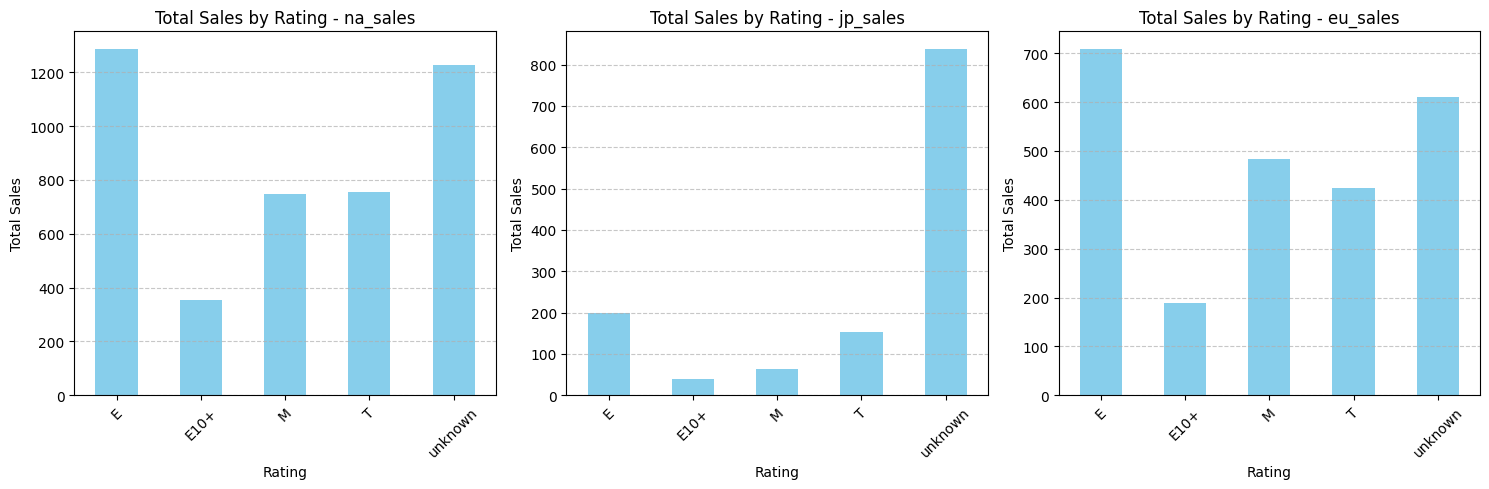

In [66]:
regions = ['na_sales', 'jp_sales', 'eu_sales']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, region in enumerate(regions):
    region_sales = df.groupby('rating')[region].sum()

    region_sales.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Total Sales by Rating - {region}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Total Sales')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In all regions, sales for games with the "Everyone" rating are strong. However, there is a notable finding where the "Unknown" rating category is quite prevalent, which may be due to games not having a specified rating yet. Additionally, in the Japanese region, the highest sales are for games with an "Unknown" rating, followed by "Everyone."

## 4. Hypothesis Testing

### 4.1. Hypothesis 1 - Average Score for Xbox One and PC User

The null hypothesis generally states that something being tested is equal, thus the value:

H0: The average user rating for the Action and Sports genres is the same.

H1: The average user rating for the Action and Sports genres is not the same.

The hypothesis testing criterion I use is the mean testing for two populations because the samples are from two different populations.

In [67]:
xbox_user_rating = df.query('platform == "XOne"')['user_score'].reset_index()
pc_user_rating = df.query('platform == "PC"')['user_score'].reset_index()

In [68]:
np.var(xbox_user_rating['user_score']), np.var(pc_user_rating['user_score'])

(1.4689619597108625, 1.849773782654905)

In [69]:
(np.var(xbox_user_rating['user_score']) - np.var(pc_user_rating['user_score']))/np.var(xbox_user_rating['user_score'])*100

-25.92387232539351

In [70]:
st.levene(xbox_user_rating['user_score'], pc_user_rating['user_score'])

LeveneResult(statistic=3.411978573108252, pvalue=0.0649677928735706)

In [71]:
t_statistic, p_value = st.ttest_ind(xbox_user_rating['user_score'], pc_user_rating['user_score'], equal_var = True)

alpha = 0.05

print("Two-Sample T-Test Results:")
print(f"  Test Statistic: {t_statistic}")
print(f"  p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Conclusion: There is sufficient evidence to suggest that the average user scores for Xbox One and PC users are not the same.")
else:
    print("Fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to suggest that the average user scores for Xbox One and PC users are different.")

Two-Sample T-Test Results:
  Test Statistic: -4.3576544409438345
  p-value: 1.4256132607532057e-05
Reject the null hypothesis.
Conclusion: There is sufficient evidence to suggest that the average user scores for Xbox One and PC users are not the same.


### 4.2. Hypothesis 2 - Average Score for Action and Sport Genre

The null hypothesis generally states that the hypothesis being tested is true or equal, resulting in the value:

H0: The average user rating for the Action and Sports genres is the same.

H1: The average user rating for the Action and Sports genres is not the same.

The criteria for hypothesis testing that I use is the testing of means for two populations because the samples are from two different populations.

In [72]:
action_rating = df.query('genre == "Action"')['user_score'].reset_index()
sports_rating = df.query('genre == "Sports"')['user_score'].reset_index()

In [73]:
np.var(action_rating['user_score']), np.var(sports_rating['user_score'])

(1.1020418144422348, 1.223132451901922)

In [74]:
(np.var(action_rating['user_score']) - np.var(sports_rating['user_score']))/np.var(action_rating['user_score'])*100

-10.987844188196574

In [75]:
st.levene(action_rating['user_score'], sports_rating['user_score'])

LeveneResult(statistic=0.01661947781352594, pvalue=0.8974282480225726)

In [76]:
t_statistic, p_value = st.ttest_ind(action_rating['user_score'], sports_rating['user_score'], equal_var = False)

alpha = 0.05

print("Two-Sample T-Test Results:")
print(f"  Test Statistic: {t_statistic}")
print(f"  p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Conclusion: There is sufficient evidence to suggest that the average user scores for Action and Sport genre are not the same.")
else:
    print("Fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to suggest that the average user scores for Action and Sport genre are different.")

Two-Sample T-Test Results:
  Test Statistic: 3.4140696063017333
  p-value: 0.0006452486535981188
Reject the null hypothesis.
Conclusion: There is sufficient evidence to suggest that the average user scores for Action and Sport genre are not the same.


## 5. Summary

After examining the dataset, several key points emerge. Firstly, it contains 16,715 rows, with notable columns like 'Name,' 'Year_of_Release,' 'Genre,' 'Critic_Score,' 'User_Score,' and 'Rating' exhibiting null values. 'User_Score' and 'Rating' are particularly concerning as they lack nearly a third of their values, requiring further investigation for potential imputation or column dropping. Additionally, some column names have a mix of uppercase and lowercase letters, which should be corrected to prevent errors. Non-uniqueness in the 'Name' column suggests potential duplicate data that needs verification. Data types also require scrutiny, with 'Year_of_Release' ideally containing integers and 'User_Score' in float64 format, necessitating conversion for accurate analysis. Furthermore, consideration should be given to excluding game data from 1980 to 2016 to facilitate predictions for 2017.

Moving to data analysis, the number of game releases peaked between 1995 and 2016, with a significant increase observed from 2007 to 2010, followed by stabilization around 600 games per year until 2016. The top 6 platforms in terms of total sales are PS2, X360, Wii, PS3, DS, and PS, with notable fluctuations in sales over the years. Some platforms experienced a decline in sales after reaching annual sales of $100 million, while others, like PS and PS2, peaked in certain years before declining. Moreover, correlation analysis reveals nuanced relationships between critical acclaim, user satisfaction, and sales performance across different gaming platforms.

The analysis also highlights regional variations in gaming platform preferences and genre popularity. Action and Sports genres consistently lead in total sales across different regions, while other genres show regional variations. Sales data for games with the "Everyone" rating is strong across all regions, although there's a prevalence of games with an "Unknown" rating, especially in Japan.

Regarding hypothesis testing, two hypotheses were evaluated. The first hypothesis tested the average user scores for Xbox One and PC users, resulting in the rejection of the null hypothesis, indicating that the average user scores are not the same. Similarly, the second hypothesis tested the average user scores for Action and Sports genres, also rejecting the null hypothesis, suggesting that their average user scores differ.

In summary, the dataset analysis reveals insights into game release trends, platform performance, genre popularity, and regional preferences. Additionally, hypothesis testing provides statistical evidence supporting differences in user scores across platforms and genres. These findings can inform strategic decisions for game developers and publishers, guiding their efforts to create successful and marketable gaming products.